# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Mount the drive and read the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/NLP/Assignment-02

/content/drive/MyDrive/NLP/Assignment-02


In [13]:
df = pd.read_csv('moviereviews.tsv', sep='\t')

In [14]:
df.shape

(2000, 2)

In [15]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


# Checking for null values

In [16]:
df.isnull().sum()

,0
label,0
review,35


# removing null samples because is not useful

In [17]:
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum()

(1965, 2)


,0
label,0
review,0


# Check if the data is balanced

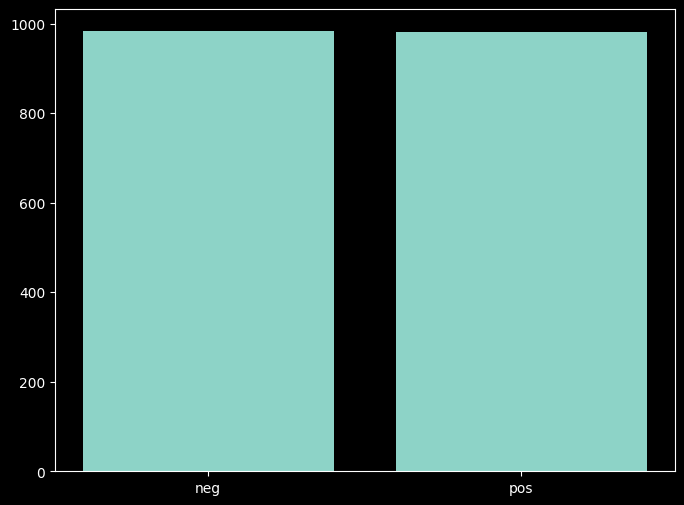

In [18]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['label'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()


# Tansform Labels into numbers

In [19]:
df['label'] = df['label'].map({'neg': 0, 'pos': 1})

In [20]:
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


# Extract features and labels from the data

In [21]:
features = df['review']
labels = df['label'].values

# Split the data into training and testing

In [22]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Map the text into numbers using CountVectorizer

In [23]:
featurizer = CountVectorizer()
Xtrain = featurizer.fit_transform(train_data)
Xtest = featurizer.transform(test_data)

In [24]:
Xtrain

<1572x35516 sparse matrix of type '<class 'numpy.int64'>'
	with 515362 stored elements in Compressed Sparse Row format>

# Instantiate Naive Bayes Model

In [25]:
model = MultinomialNB()

# Train and test the model

In [26]:
model.fit(Xtrain, train_labels)


MultinomialNB()

# Get the probabilities Predictions from the model

In [27]:
y_pred_prob = model.predict_proba(Xtest)

In [28]:
y_pred_prob.shape

(393, 2)

# Get the class predictions from the model

In [30]:
y_pred = model.predict(Xtest)

# Observing Class Probabilities and Class prediction

In [31]:
df = pd.DataFrame({"Prob_class_0": y_pred_prob[:,0].round(2)
,"Prob_class_1": y_pred_prob[:,1].round(2)
,"Predicted class": y_pred})
df.head(20)

,Prob_class_0,Prob_class_1,Predicted class
0,1.00,0.00,0
1,1.00,0.00,0
2,1.00,0.00,0
3,1.00,0.00,0
4,1.00,0.00,0
5,0.00,1.00,1
6,1.00,0.00,0
7,0.57,0.43,0
8,1.00,0.00,0
9,0.00,1.00,1


# Create Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

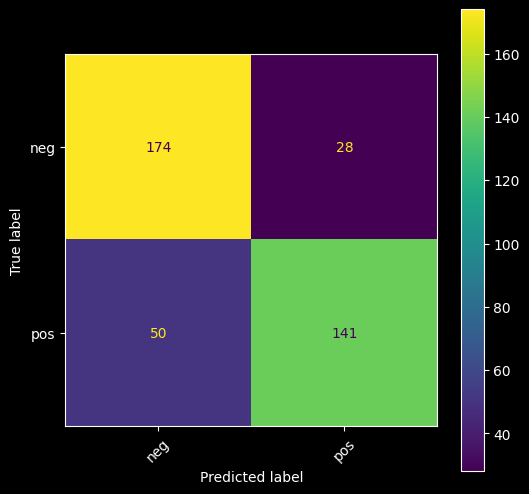

In [72]:
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['neg', 'pos'])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

# Calculate Accuracy, Precision, Recall and F1_Score

In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [58]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average = 'macro')))

Accuracy : 0.80
Precision : 0.81
Recall : 0.80
F1_Score : 0.80


# Random Tweets to check the model performance

In [77]:
review = "Amazing performance of all the cast"
review2 = "I dont know what to think about the ending, looks like an unfinished work"
review3 = "I'm happy with the adaptacion of the movie"

In [78]:
review = featurizer.transform([review])
review2 = featurizer.transform([review2])
review3 = featurizer.transform([review3])

In [80]:
print(model.predict(review))
print(model.predict(review2))
print(model.predict(review3))

[1]
[0]
[1]


# Lets Use SVC now to check the performance

In [66]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(Xtrain, train_labels)

print("Training Accuracy : %2.2f" % (svc_model.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (svc_model.score(Xtest, test_labels)))


Training Accuracy : 0.84
Testing Accuracy : 0.71


In [67]:
svc_pred = svc_model.predict(Xtest)

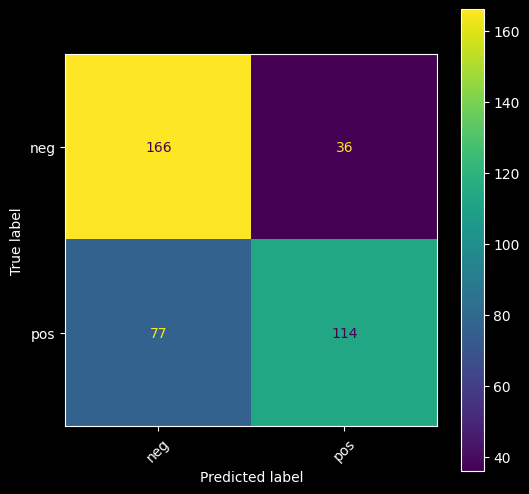

In [68]:
cm = confusion_matrix(test_labels, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['neg', 'pos'])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [69]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, svc_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, svc_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, svc_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, svc_pred, average = 'macro')))

Accuracy : 0.71
Precision : 0.72
Recall : 0.71
F1_Score : 0.71


# Lets use same custom reviews to predict new inputs

In [71]:
print(svc_model.predict(review))
print(svc_model.predict(review2))
print(svc_model.predict(review3))

[0]
[0]
[0]


# Conclusion: For this dataset the Naive Bayes model performs better